## El objetivo de este ejercicio es calcular la función de valor de una política dada usando sampleo Monte Carlo.
<img src="Prediccion_MC.PNG">

In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np

from collections import defaultdict
from lib import plotting

matplotlib.style.use('ggplot')

# en caso de correrlo en google colab
# de esta manera podremos tener la carpeta lib (donde se encuentra en ambiente Gridworld)

# import sys
#if "../" not in sys.path:
#  sys.path.append("../") 

# !git clone https://github.com/julianfm7/cursoRL-FIUBA

# necesario en google colab para que sys.path busque
# y encuentre la carpeta lib donde se encuentra el ambiente Gridworld

# !mv cursoRL-FIUBA cursoRLFIUBA

import numpy as np
from lib.envs.blackjack import BlackjackEnv

In [2]:
env = BlackjackEnv()

In [3]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Algoritmo de predicción Monte Carlo "primera-visita". Calcula la función de valor para una 
    politica dada usando sampleo.
    
    Argumentos:
        policy: Política, función que mapea observaciones a probabilidades de cada acción.
        env: Ambiente de OpenAI gyn.
        num_episodes: Número de episodios a samplear.
        discount_factor: factor de descuento gama.
    
    Retorna:
        Un diccionario que mapea estado -> valor.
        El estado es una tupla y el valor es un float.
    """

    # Mantiene una suma y conteo de los retornos de cada estado
    # para calcular un promedio. Podría usarse un array para guardar todos los retornos
    # pero sería ineficiente en memoria.
    # CUIDADO: las llaves de un diccionario deben ser inmutables, por ejemplo tuples
    """
    Link sobre defaultdict:
    https://docs.python.org/2/library/collections.html#collections.defaultdict
    """
#     returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # El valor final de la función de valor
    V = defaultdict(float)
    
    
    def generar_episodio():
        episodio = []
        observation = env.reset()
        while True:
            action = policy(observation)
            observation_old = observation
            observation, reward, done, _ = env.step(action)
            episodio.append((observation_old,action,reward))
            if done or len(episodio)==100:
                break
        return np.array(episodio)
    
    
    # Implementar!
    
    # CONSEJOS:
    # loop num_episodes veces
    for _ in range(num_episodes):
      # generar un episodio de máximo 100 pasos
      # un episodio es una lista de tuplas (estado, accion, recompensa)
        episodio = generar_episodio()
#         print(episodio)
      # con el episodio generado: 
      # iterar sobre los estados visitados en este episodio, 
      # TIP 1: podemos usar set() para obtener estados unicos
      # por cada estado encontrar su primera aparición en el episodio (estamos implementando "primera-visita")
      # obtener el retorno a partir de ese momento
      # TIP 2: es posible iterar sobre los indices y valores devueltos por enumerate(lista)
        G = 0
        for tiempo, estado_action_reward in enumerate(reversed(episodio)):
            estado = estado_action_reward[0]
#             action = estado_action_reward[1]
            reward = estado_action_reward[2]
            G = discount_factor*G + reward
            estados_anteriores = set( list(reversed(episodio[:,0]))[tiempo+1:] )
            if estado not in estados_anteriores:
#                 returns_sum[(estado)] += G
                returns_count[(estado)] += 1
#                 V[(estado)] = returns_sum[(estado)]/returns_count[(estado)]
                V[(estado)] += (G-V[(estado)])/returns_count[(estado)] #forma copada de actualizar el promedio dado un dato nuevo
     
    return V    

In [4]:
def sample_policy(observation):
    """
    Una política que se planta si el jugador tiene un puntaje > 20 y pide otra carta caso contrario.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

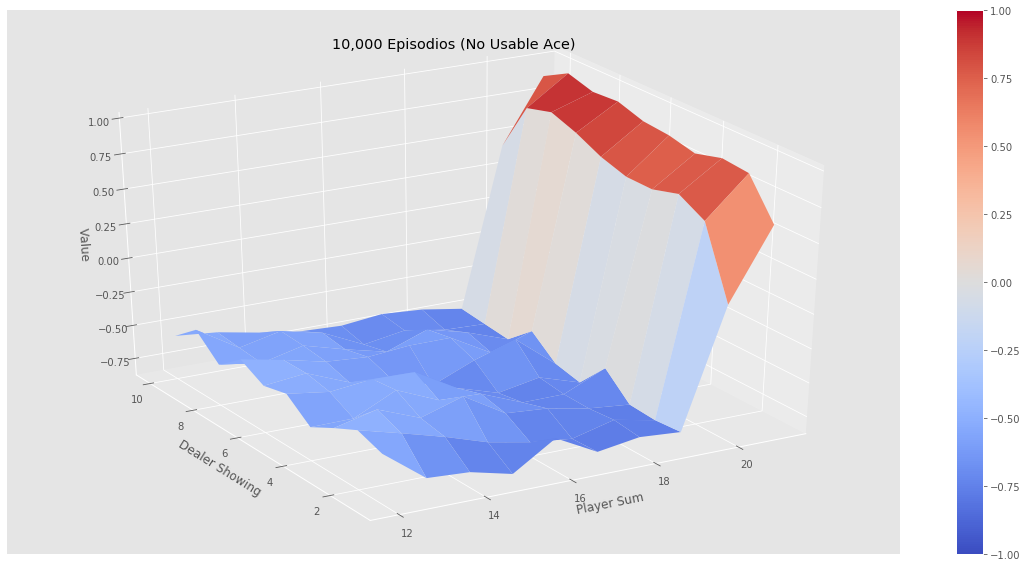

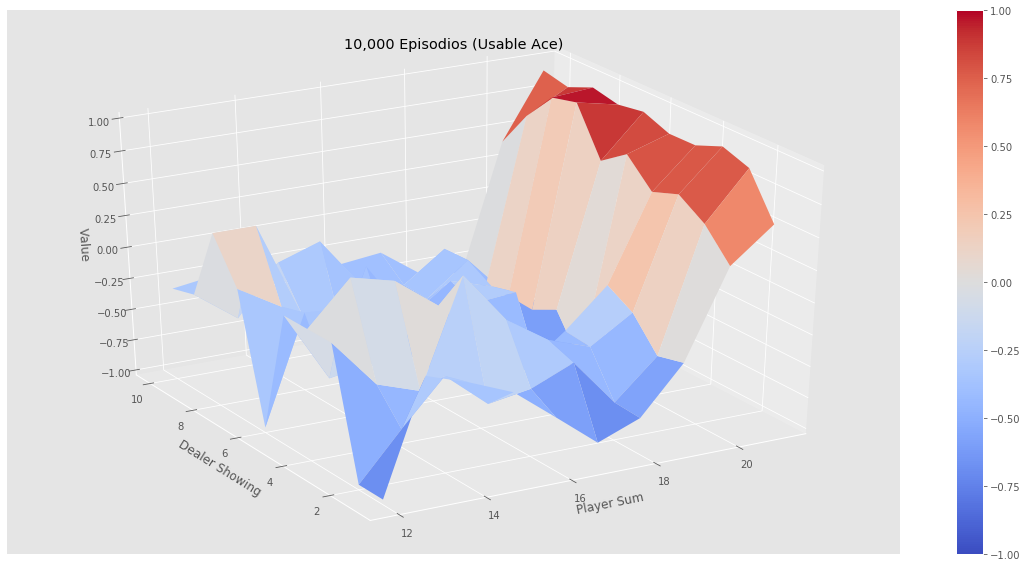

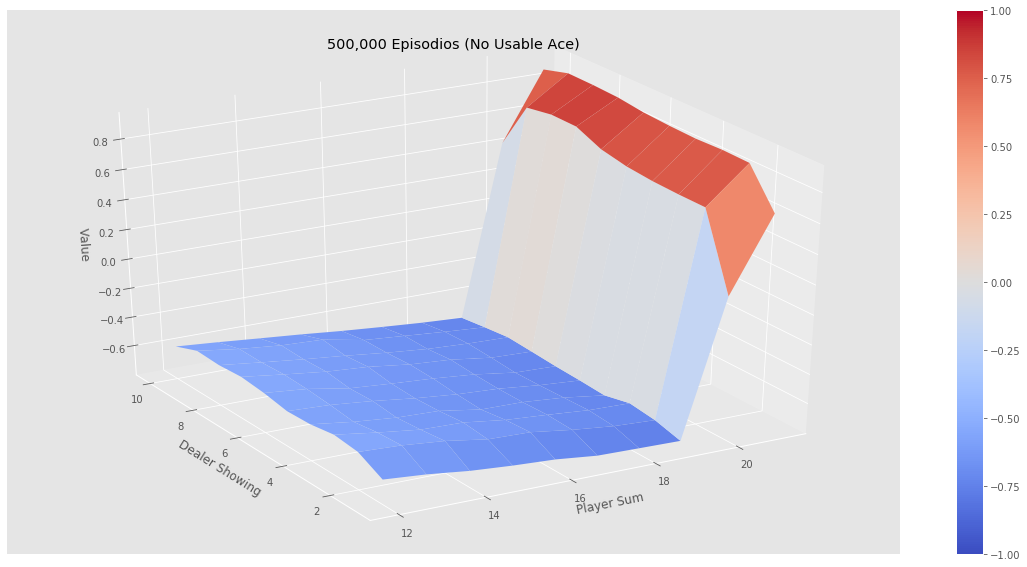

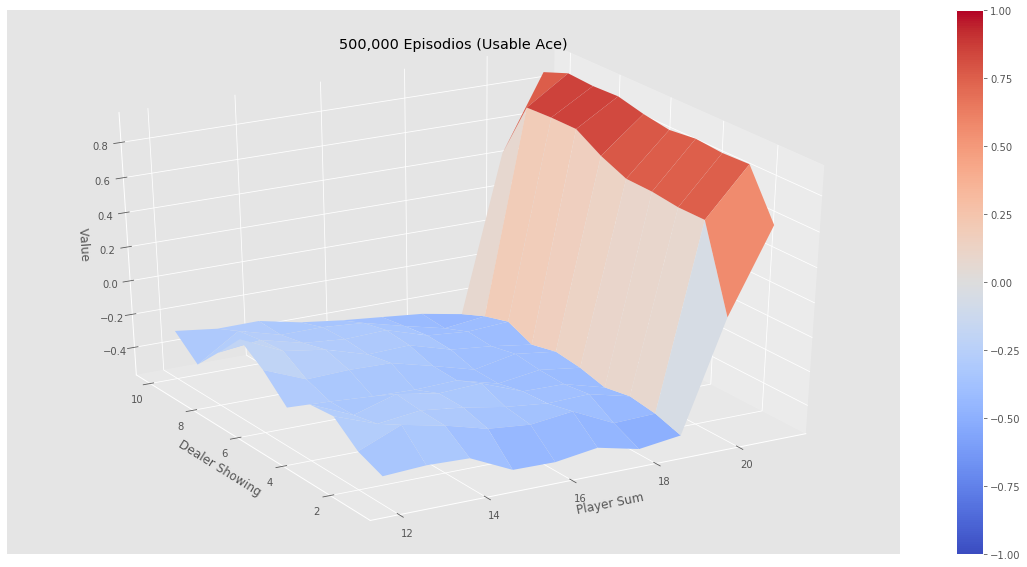

In [5]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Episodios")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Episodios")